<a href="https://colab.research.google.com/github/Tema13379/cian_progect/blob/main/home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing

Выводим таблицу

In [2]:
df = pd.read_csv('home.csv')
df.columns = ['Город', 'Тип сделки', 'Тип недвижимости', 'Этаж квартиры', 'Сколько этажей в доме', 'Количество комнат', 'Общая площадь квартиры', 'Цена', 'Микрорайон', 'Улица', 'Дом', 'Станция метро или жд', 'Название жилого комплекса']
df.iloc[::]

,Город,Тип сделки,Тип недвижимости,Этаж квартиры,Сколько этажей в доме,Количество комнат,Общая площадь квартиры,Цена,Микрорайон,Улица,Дом,Станция метро или жд,Название жилого комплекса
0,Балашиха,sale,flat,7,16,1,42.30,7250000,NaN,Юбилейная,4к5,Железнодорожная,NaN
1,Балашиха,sale,flat,3,16,1,34.00,6000000,NaN,Жилгородок,9А,Ольгино,NaN
2,Балашиха,sale,flat,15,22,1,36.39,6390771,NaN,NaN,к8,Некрасовка,Новоград Павлино
3,Балашиха,sale,flat,19,25,1,36.30,5300000,NaN,Яганова,9,Щёлковская,Пехра
4,Балашиха,sale,flat,2,16,1,32.00,4900000,NaN,Октябрьская,17,Железнодорожная,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4517,Долгопрудный,sale,flat,3,9,2,49.50,8600000,мкр. Гранитный,Молодежная,20,NaN,NaN
4518,Долгопрудный,sale,flat,17,23,1,34.10,8350000,NaN,Парковая,48,Долгопрудная,Бригантина
4519,Долгопрудный,sale,flat,5,5,2,50.70,8850000,NaN,Восточная,39,Долгопрудная,NaN
4520,Долгопрудный,sale,flat,3,9,1,37.00,7500000,NaN,Академика Лаврентьева,5,Водники,NaN


In [3]:
columns = list(df.columns)
print(columns)
df = df.drop([ 'Тип сделки', 'Тип недвижимости', 'Микрорайон', 'Дом'], axis=1)
columns = list(df.columns)
print(columns)

['Город', 'Тип сделки', 'Тип недвижимости', 'Этаж квартиры', 'Сколько этажей в доме', 'Количество комнат', 'Общая площадь квартиры', 'Цена', 'Микрорайон', 'Улица', 'Дом', 'Станция метро или жд', 'Название жилого комплекса']
['Город', 'Этаж квартиры', 'Сколько этажей в доме', 'Количество комнат', 'Общая площадь квартиры', 'Цена', 'Улица', 'Станция метро или жд', 'Название жилого комплекса']


In [4]:
print(f'Data has {df.shape[0]} rows , {df.shape[1]} columns.')

Data has 4522 rows , 9 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Город                      4522 non-null   object 
 1   Этаж квартиры              4522 non-null   int64  
 2   Сколько этажей в доме      4522 non-null   int64  
 3   Количество комнат          4522 non-null   int64  
 4   Общая площадь квартиры     4522 non-null   float64
 5   Цена                       4522 non-null   object 
 6   Улица                      3702 non-null   object 
 7   Станция метро или жд       4456 non-null   object 
 8   Название жилого комплекса  2660 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 318.1+ KB


<Axes: >

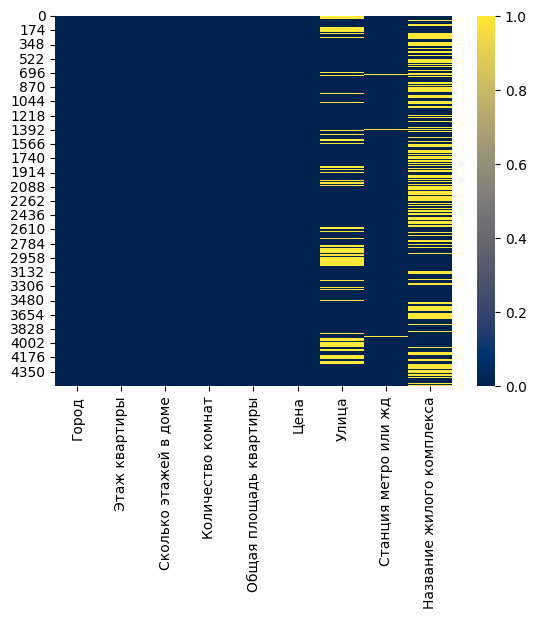

In [6]:
sns.heatmap(df.isnull(),cmap='cividis')

In [7]:
df.isnull().sum()

,0
Город,0
Этаж квартиры,0
Сколько этажей в доме,0
Количество комнат,0
Общая площадь квартиры,0
Цена,0
Улица,820
Станция метро или жд,66
Название жилого комплекса,1862


In [8]:
df.head(5)

,Город,Этаж квартиры,Сколько этажей в доме,Количество комнат,Общая площадь квартиры,Цена,Улица,Станция метро или жд,Название жилого комплекса
0,Балашиха,7,16,1,42.30,7250000,Юбилейная,Железнодорожная,NaN
1,Балашиха,3,16,1,34.00,6000000,Жилгородок,Ольгино,NaN
2,Балашиха,15,22,1,36.39,6390771,NaN,Некрасовка,Новоград Павлино
3,Балашиха,19,25,1,36.30,5300000,Яганова,Щёлковская,Пехра
4,Балашиха,2,16,1,32.00,4900000,Октябрьская,Железнодорожная,NaN


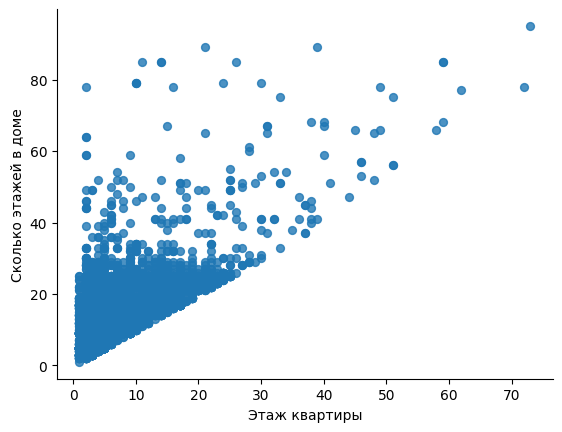

In [ ]:
# @title Этаж квартиры vs Сколько этажей в доме

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Этаж квартиры', y='Сколько этажей в доме', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

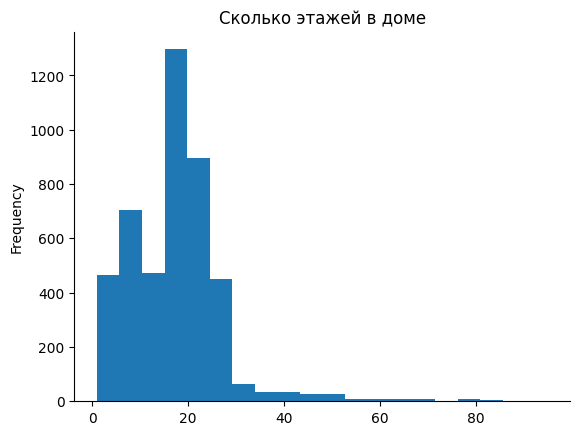

In [ ]:
# @title Сколько этажей в доме

from matplotlib import pyplot as plt
df['Сколько этажей в доме'].plot(kind='hist', bins=20, title='Сколько этажей в доме')
plt.gca().spines[['top', 'right',]].set_visible(False)

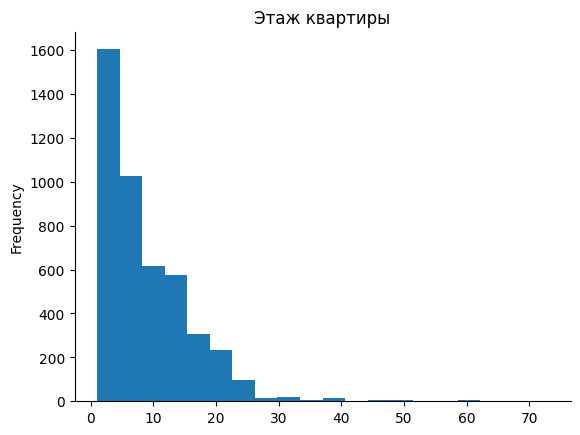

In [ ]:
# @title Этаж квартиры

from matplotlib import pyplot as plt
df['Этаж квартиры'].plot(kind='hist', bins=20, title='Этаж квартиры')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [9]:

def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [10]:
missing_percent = get_numerical_summary(df)

Улица : 820 (18.134%)
Станция метро или жд : 66 (1.46%)
Название жилого комплекса : 1862 (41.176%)


In [11]:
df_cleaned = df.dropna(thresh=2)

<Figure size 1000x600 with 0 Axes>

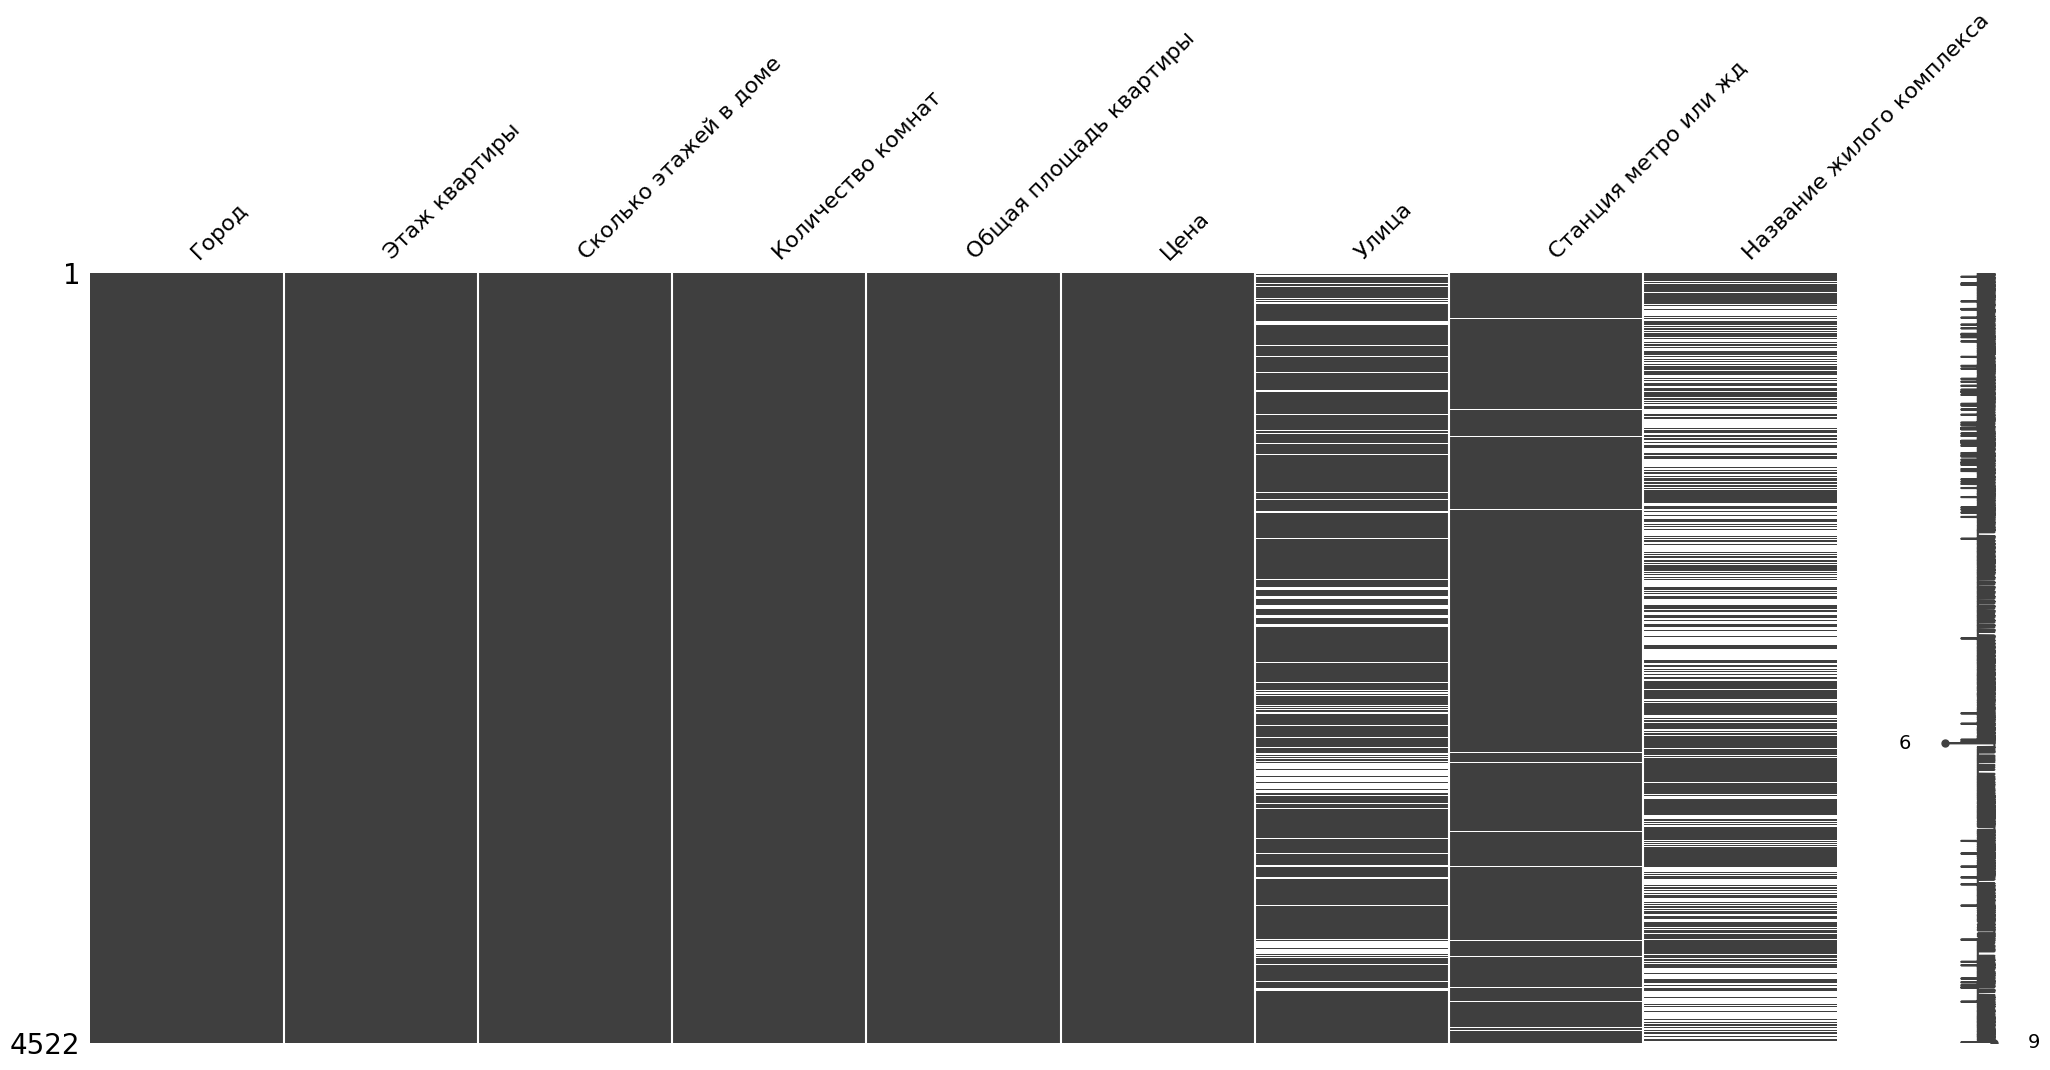

In [15]:
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

<Figure size 1000x600 with 0 Axes>

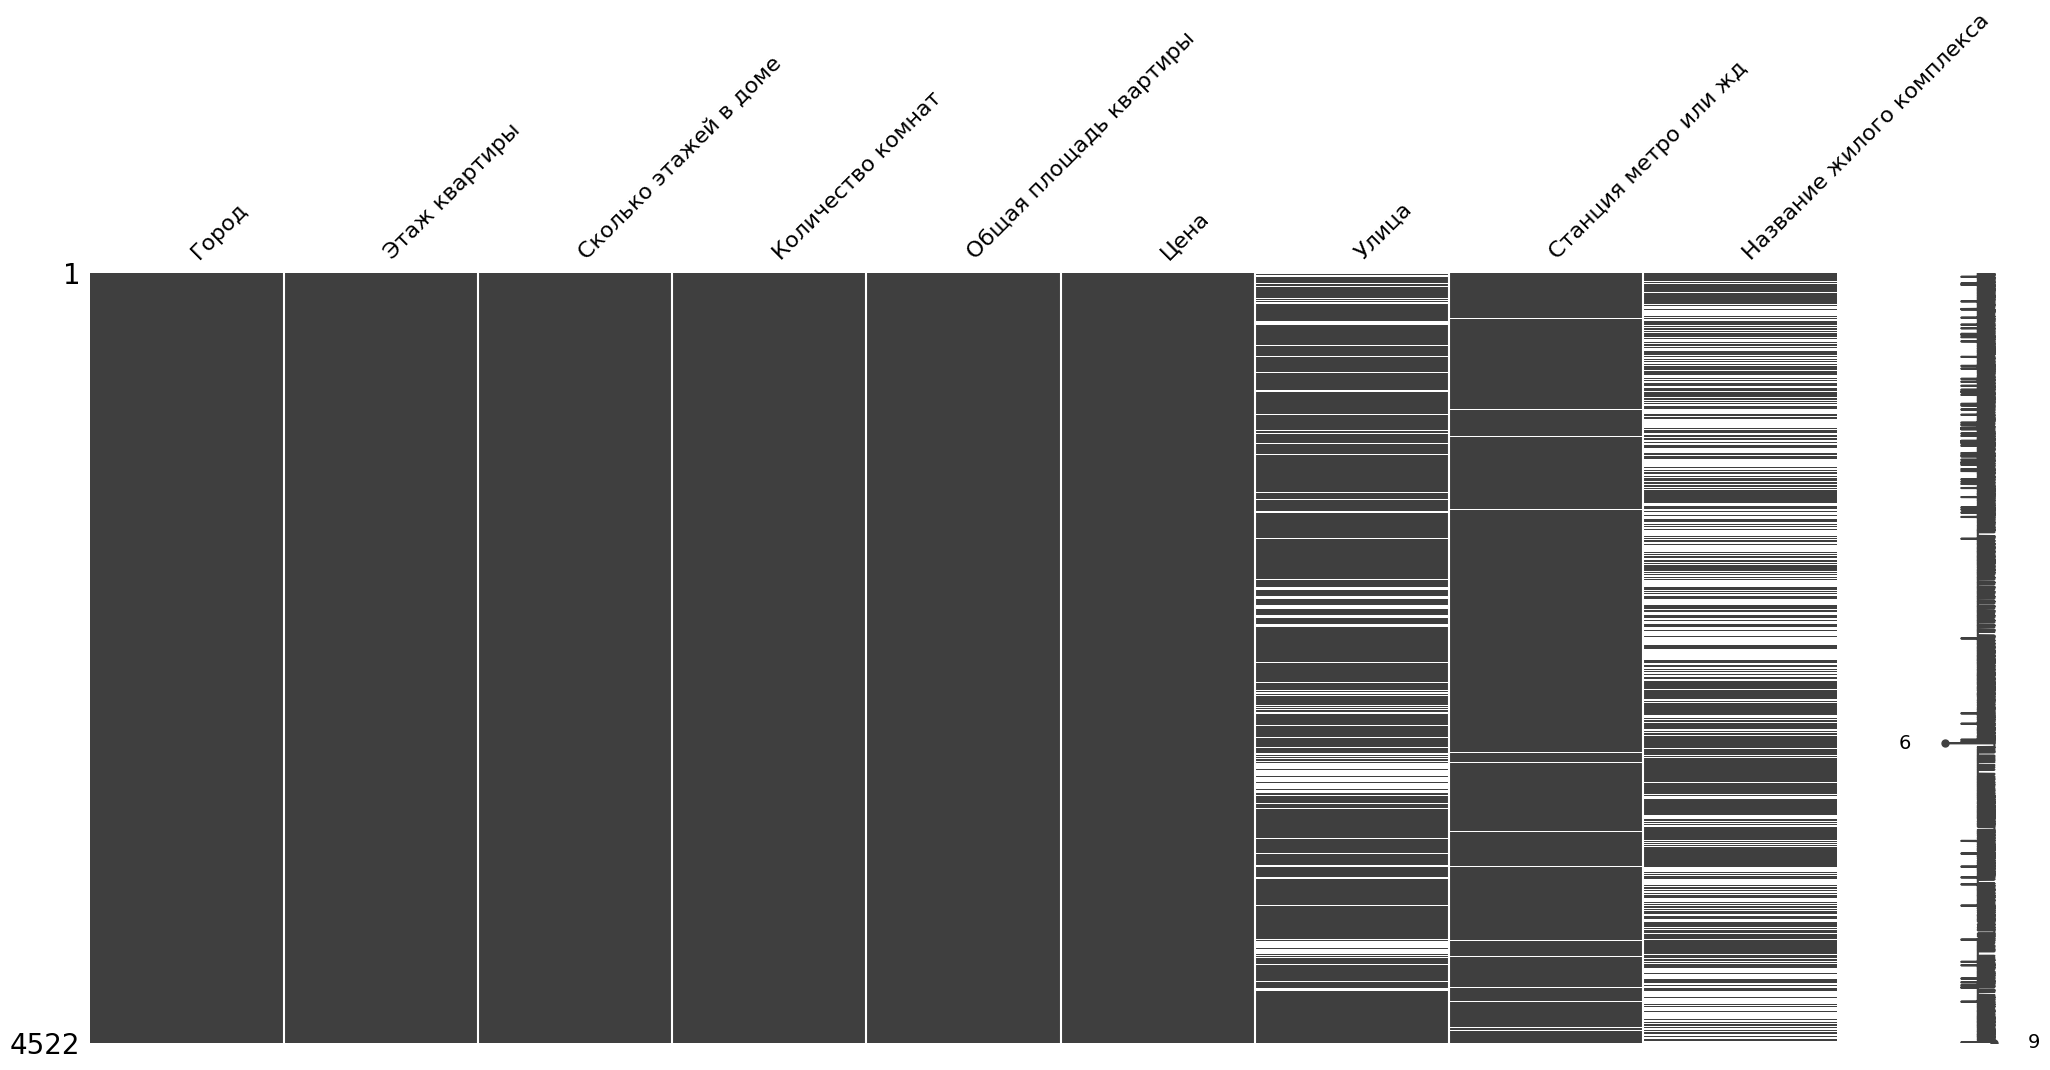

In [16]:
df_cleaned = df.dropna(thresh=3)

plt.figure(figsize=(10, 6))
msno.matrix(df_cleaned)
plt.show()

In [17]:
df_cleaned.replace(-1, np.nan, inplace=True)


In [46]:
df_cleaned['Станция метро или жд'] = pd.to_numeric(df_cleaned['Станция метро или жд'], errors='coerce')


In [49]:
if df_cleaned['Цена'].isnull().any():
    print("Внимание: В столбцах 'Цена' есть недопустимые значения. Проверьте данные.")

In [31]:
thresholds = {
    'Цена': (1000000, 1000000000)
}

In [37]:
def number_encode_features(init_df):
    result = init_df.copy()  # Копируем исходную таблицу
    encoders = {}  # Словарь для хранения кодировщиков
    for column in result.columns:
        if result[column].dtype == 'object':  # Если тип столбца - строка
            encoders[column] = preprocessing.LabelEncoder()  # Создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column])  # Кодируем столбец
    return result, encoders

In [30]:
for column, (lower, upper) in thresholds.items():
    if column in df_cleaned.columns:
        # Оставляем только строки, удовлетворяющие условиям и имеющие непустые значения
        df_cleaned = df_cleaned[df_cleaned[column].notna() & (df_cleaned[column] >= lower) & (df_cleaned[column] <= upper)]
    else:
        print(f"Столбец '{column}' не найден.")

print("\nРазмеры DataFrame после удаления выбросов:")
print(df_cleaned.shape)а


Размеры DataFrame после удаления выбросов:
(3857, 9)


In [22]:
def remove_outliers(df, columns):
    """Удаляет выбросы на основе 1.5 IQR для указанных столбцов."""
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [23]:
df_cleaned = remove_outliers(df_cleaned, ['Цена'])

In [36]:
encoded_data, encoders = number_encode_features(df_cleaned)


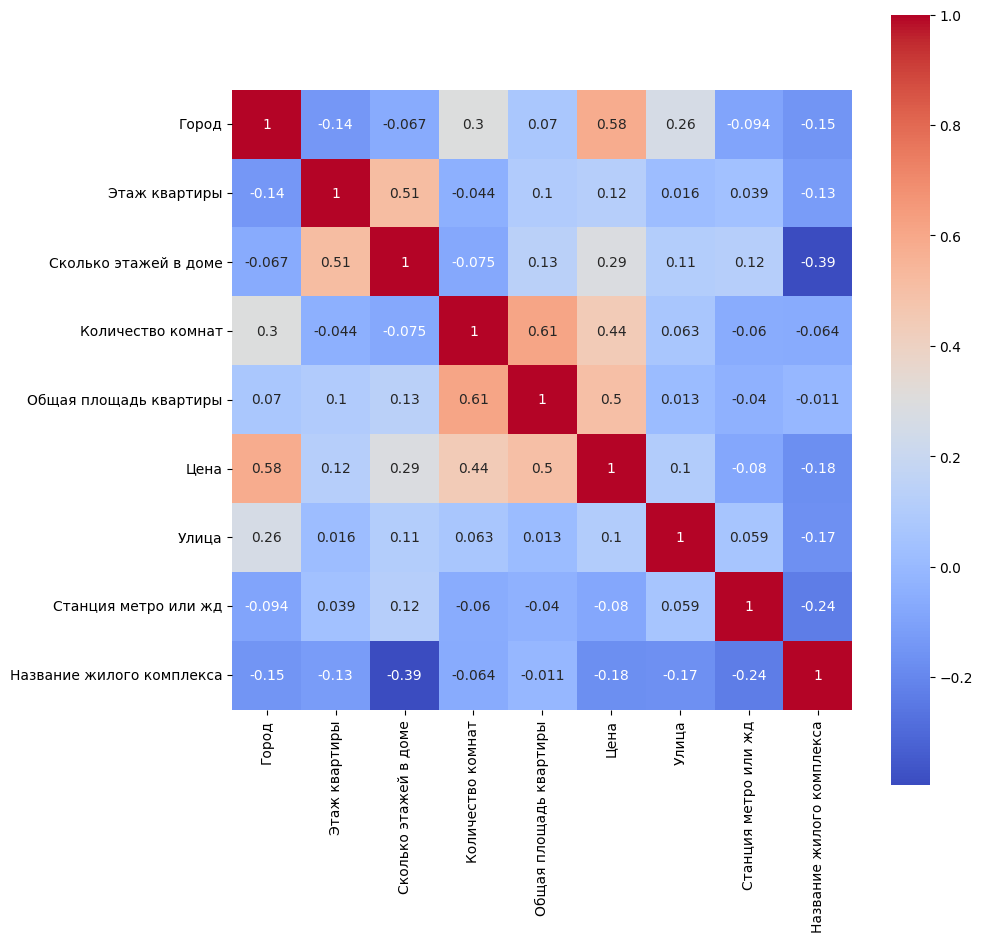

In [38]:
plt.subplots(figsize=(10, 10))
sns.heatmap(encoded_data.corr(), square=True, annot=True, cmap='coolwarm')
plt.show()

In [40]:
df_cleaned['price_per_sqm'] = df_cleaned['Цена'] / df_cleaned['Общая площадь квартиры']


In [41]:
df_cleaned = df_cleaned[df_cleaned['Общая площадь квартиры'] > 0]


In [42]:
average_price_per_sqm = df_cleaned['price_per_sqm'].mean()


In [43]:
print(f"\nСредняя цена за квадратный метр: {average_price_per_sqm:.2f} Рублей")



Средняя цена за квадратный метр: 215440.97 Рублей


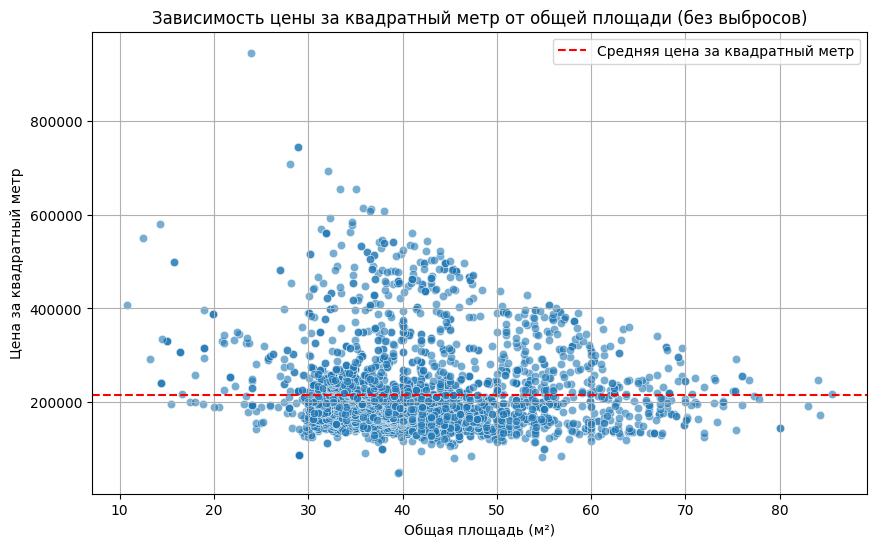

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Общая площадь квартиры', y='price_per_sqm', alpha=0.6)
plt.title('Зависимость цены за квадратный метр от общей площади (без выбросов)')
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Цена за квадратный метр')
plt.axhline(y=average_price_per_sqm, color='r', linestyle='--', label='Средняя цена за квадратный метр')
plt.legend()
plt.grid()
plt.show()